In [34]:
%matplotlib inline


# Dimensionality Reduction with Neighborhood Components Analysis


Sample usage of Neighborhood Components Analysis for dimensionality reduction.

This example compares different (linear) dimensionality reduction methods
applied on the Digits data set. The data set contains images of digits from
0 to 9 with approximately 180 samples of each class. Each image is of
dimension 8x8 = 64, and is reduced to a two-dimensional data point.

Principal Component Analysis (PCA) applied to this data identifies the
combination of attributes (principal components, or directions in the
feature space) that account for the most variance in the data. Here we
plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (LDA) tries to identify attributes that
account for the most variance *between classes*. In particular,
LDA, in contrast to PCA, is a supervised method, using known class labels.

Neighborhood Components Analysis (NCA) tries to find a feature space such
that a stochastic nearest neighbor algorithm will give the best accuracy.
Like LDA, it is a supervised method.

One can see that NCA enforces a clustering of the data that is visually
meaningful despite the large reduction in dimension.



In [35]:
# License: BSD 3 clause  

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [38]:
n_neighbors = 3
random_state = 0

In [39]:
# Load Digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

In [40]:
# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)

In [41]:

dim = len(X[0])
n_classes = len(np.unique(y))

In [42]:
X_train

array([[ 0.,  0., 13., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ..., 15.,  0.,  0.],
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ..., 16.,  2.,  0.],
       [ 0.,  0.,  5., ..., 10.,  8.,  3.]])

In [43]:
X_test

array([[ 0.,  0.,  0., ..., 12.,  8.,  0.],
       [ 0.,  0., 10., ...,  0.,  0.,  0.],
       [ 0.,  0., 12., ..., 15.,  1.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ...,  1.,  0.,  0.],
       [ 0.,  2., 10., ..., 13.,  3.,  0.]])

In [44]:
y_train

array([8, 1, 4, 3, 1, 6, 2, 8, 6, 5, 2, 3, 2, 7, 9, 3, 9, 4, 2, 6, 4, 1,
       6, 8, 9, 1, 8, 4, 9, 2, 4, 7, 5, 6, 2, 3, 8, 6, 4, 2, 5, 9, 3, 7,
       1, 3, 3, 2, 1, 1, 2, 5, 5, 3, 2, 3, 0, 2, 0, 6, 0, 6, 0, 2, 6, 8,
       3, 8, 0, 6, 8, 7, 0, 3, 7, 3, 7, 1, 7, 7, 6, 6, 0, 7, 9, 8, 2, 8,
       3, 6, 3, 5, 5, 2, 0, 2, 1, 8, 4, 7, 4, 4, 2, 4, 9, 4, 1, 6, 7, 2,
       5, 4, 2, 0, 5, 9, 7, 0, 4, 8, 8, 3, 7, 9, 6, 1, 2, 9, 7, 8, 9, 8,
       8, 0, 7, 3, 8, 9, 5, 3, 9, 9, 5, 4, 0, 3, 4, 6, 3, 8, 7, 5, 3, 0,
       1, 4, 6, 6, 4, 0, 0, 0, 8, 0, 4, 8, 9, 6, 9, 8, 1, 5, 9, 3, 7, 2,
       7, 8, 2, 9, 4, 6, 2, 8, 5, 6, 4, 1, 7, 6, 0, 6, 7, 6, 9, 1, 1, 2,
       7, 9, 7, 5, 5, 1, 2, 3, 4, 2, 1, 9, 1, 7, 8, 5, 6, 6, 5, 3, 5, 2,
       9, 6, 1, 1, 8, 9, 8, 8, 1, 1, 3, 3, 3, 7, 7, 2, 9, 5, 7, 1, 0, 3,
       7, 7, 2, 8, 7, 1, 5, 9, 9, 5, 8, 8, 1, 0, 3, 3, 1, 7, 7, 9, 3, 5,
       1, 3, 4, 5, 5, 3, 2, 6, 0, 8, 2, 6, 0, 0, 3, 8, 3, 3, 8, 2, 4, 4,
       5, 6, 3, 7, 7, 3, 2, 4, 2, 1, 4, 7, 5, 2, 4,

In [45]:
y_test

array([6, 5, 9, 4, 8, 8, 2, 3, 9, 3, 0, 7, 0, 4, 3, 7, 7, 3, 7, 3, 5, 2,
       7, 3, 7, 9, 2, 6, 1, 3, 5, 1, 5, 2, 2, 4, 5, 7, 8, 7, 9, 0, 1, 4,
       8, 7, 7, 9, 0, 5, 3, 7, 2, 6, 6, 7, 8, 5, 5, 9, 1, 7, 5, 1, 5, 8,
       2, 7, 9, 8, 8, 5, 4, 6, 2, 3, 4, 1, 1, 4, 4, 7, 7, 9, 4, 9, 2, 2,
       7, 2, 8, 0, 6, 7, 4, 1, 6, 0, 6, 0, 4, 1, 3, 2, 6, 7, 9, 8, 8, 9,
       8, 9, 4, 1, 0, 6, 1, 4, 1, 9, 3, 3, 0, 2, 8, 1, 0, 9, 8, 8, 9, 7,
       5, 1, 3, 8, 0, 6, 5, 5, 0, 0, 3, 9, 0, 6, 6, 9, 1, 9, 7, 2, 1, 5,
       2, 5, 6, 7, 2, 6, 1, 5, 6, 0, 9, 3, 8, 5, 2, 5, 3, 4, 6, 6, 2, 2,
       7, 2, 1, 5, 9, 4, 6, 3, 3, 9, 3, 3, 2, 0, 1, 6, 0, 0, 4, 3, 5, 9,
       0, 2, 7, 9, 5, 4, 0, 7, 6, 5, 8, 6, 8, 9, 9, 0, 4, 8, 6, 4, 5, 5,
       7, 3, 4, 0, 7, 7, 4, 6, 2, 8, 8, 9, 6, 2, 0, 8, 0, 1, 0, 6, 1, 2,
       6, 4, 2, 3, 6, 3, 3, 8, 6, 4, 1, 5, 7, 2, 6, 4, 3, 2, 6, 6, 1, 1,
       7, 0, 7, 8, 9, 0, 9, 8, 8, 8, 6, 1, 3, 0, 3, 0, 9, 9, 4, 6, 5, 6,
       4, 6, 5, 1, 4, 8, 3, 3, 5, 7, 7, 9, 1, 8, 4,

In [46]:
dim

64

In [47]:
n_classes

10

In [48]:

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))


In [49]:
pca


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=0, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [50]:
# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

In [51]:
lda

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lineardiscriminantanalysis',
                 LinearDiscriminantAnalysis(n_components=2, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001))],
         verbose=False)

In [52]:

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

In [53]:
nca

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('neighborhoodcomponentsanalysis',
                 NeighborhoodComponentsAnalysis(callback=None, init='auto',
                                                max_iter=50, n_components=2,
                                                random_state=0, tol=1e-05,
                                                verbose=0, warm_start=False))],
         verbose=False)

In [54]:

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [55]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [56]:
# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

In [57]:
# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [58]:
# Fit the method's model
model.fit(X_train, y_train)

C:\Users\School\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('neighborhoodcomponentsanalysis',
                 NeighborhoodComponentsAnalysis(callback=None, init='auto',
                                                max_iter=50, n_components=2,
                                                random_state=0, tol=1e-05,
                                                verbose=0, warm_start=False))],
         verbose=False)

In [59]:
 # Fit a nearest neighbor classifier on the embedded training set
knn.fit(model.transform(X_train), y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [60]:
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(model.transform(X_test), y_test)

In [61]:
acc_knn

0.6952169076751946

In [62]:
 # Embed the data set in 2 dimensions using the fitted model
X_embedded = model.transform(X)


In [63]:
X_embedded

array([[ -42.21054431, -148.47008154],
       [ -23.62702373,  111.96757536],
       [   4.44819631,  127.22437157],
       ...,
       [  -6.98854949,   52.28709105],
       [ -28.9529026 ,  -65.18151632],
       [  18.97448558,   50.57904054]])

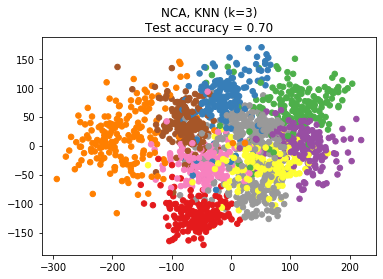

In [64]:
# Plot the projected points and show the evaluation score
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,n_neighbors,acc_knn))
plt.show()

In [68]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_neighbors = 3
random_state = 0

# Load Digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)

dim = len(X[0])
n_classes = len(np.unique(y))




C:\Users\School\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


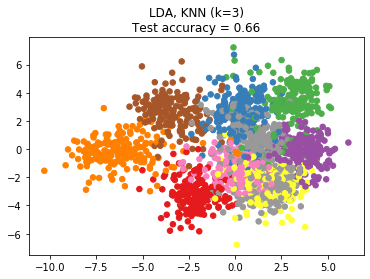

In [70]:
# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [('LDA', lda)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
plt.show()

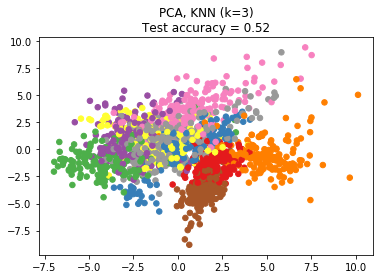

In [71]:
# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
plt.show()